In [3]:
## Importing standard libraries

%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [5]:
## Importing sklearn libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

/Users/matt/.virtualenvs/kaggle/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
## Keras Libraries for Neural Networks

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.utils.np_utils import to_categorical

Using Theano backend.


In [7]:
## Set figure size to 20x10

from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [9]:
## Read data from the CSV file

data = pd.read_csv('train.csv')
parent_data = data.copy()    ## Always a good idea to keep a copy of original data
ID = data.pop('id')

In [10]:
## Since the labels are textual, so we encode them categorically

y = data.pop('species')
y = LabelEncoder().fit(y).transform(y)
print(y.shape)

(990,)


In [11]:
## Most of the learning algorithms are prone to feature scaling
## Standardising the data to give zero mean =)

X = StandardScaler().fit(data).transform(data)
print(X.shape)

(990, 192)


In [12]:
## We will be working with categorical crossentropy function
## It is required to further convert the labels into "one-hot" representation

y_cat = to_categorical(y)
print(y_cat.shape)

(990, 99)


In [13]:
## Developing a layered model for Neural Networks
## Input dimensions should be equal to the number of features
## We used softmax layer to predict a uniform probabilistic distribution of outcomes

model = Sequential()
model.add(Dense(1024,input_dim=192))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))

In [14]:
## Error is measured as categorical crossentropy or multiclass logloss
model.compile(loss='categorical_crossentropy',optimizer='rmsprop')

In [15]:
## Fitting the model on the whole training data
history = model.fit(X,y_cat,batch_size=128,nb_epoch=100,verbose=0)

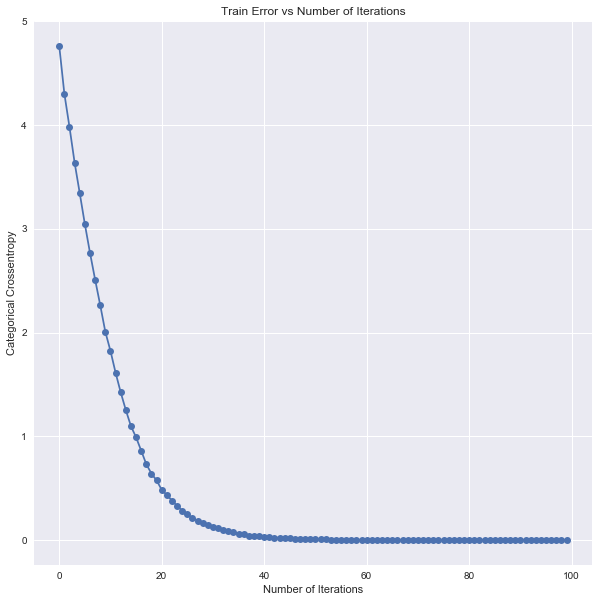

In [16]:
## Plotting the error with the number of iterations
## With each iteration the error reduces smoothly

plt.plot(history.history['loss'],'o-')
plt.xlabel('Number of Iterations')
plt.ylabel('Categorical Crossentropy')
plt.title('Train Error vs Number of Iterations')

In [18]:
test = pd.read_csv('test.csv')
index = test.pop('id')
test = StandardScaler().fit(test).transform(test)
yPred = model.predict_proba(test)

512/594 [========================>.....] - ETA: 0s

In [19]:
## Converting the test predictions in a dataframe as depicted by sample submission

yPred = pd.DataFrame(yPred,index=index,columns=sort(parent_data.species.unique()))

In [20]:
fp = open('submission_nn_kernel.csv','w')
fp.write(yPred.to_csv())